In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
folder_path = "C:/Users/azizi/Desktop/joueurs"  # Remplace par le chemin réel

# Lister tous les fichiers CSV du dossier
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
print("📂 Fichiers trouvés :", csv_files)
# Suppression des doublons sur le nom du joueur
data = data.drop_duplicates(subset=["full_name"], keep='first')

# Suppression des lignes avec "Unknown Player" (prise en compte des variations d'espaces et majuscules)
data = data[~data["full_name"].str.strip().str.lower().isin(["unknown player", "", None])]


# Suppression des valeurs nulles
data = data.dropna()

📂 Fichiers trouvés : ['algeria-ligue-1-players-2022-to-2023-stats.csv', 'algeria-ligue-1-players-2024-to-2025-stats.csv', 'egypt-egyptian-premier-league-players-2018-to-2019-stats.csv', 'egypt-egyptian-premier-league-players-2021-to-2022-stats.csv', 'egypt-egyptian-premier-league-players-2022-to-2023-stats.csv', 'egypt-egyptian-premier-league-players-2024-to-2025-stats.csv', 'final_merged_african_leagues_stats.csv', 'full_merged_african_leagues_stats.csv', 'merged_african_leagues_stats.csv', 'morocco-botola-pro-players-2021-to-2022-stats.csv', 'morocco-botola-pro-players-2022-to-2023-stats.csv', 'morocco-botola-pro-players-2024-to-2025-stats.csv', 'nigeria-npfl-players-2021-to-2022-stats.csv', 'south-africa-premier-soccer-league-players-2021-to-2022-stats.csv', 'south-africa-premier-soccer-league-players-2024-to-2025-stats.csv', 'tunisia-ligue-1-players-2018-to-2019-stats.csv', 'tunisia-ligue-1-players-2021-to-2022-stats.csv', 'tunisia-ligue-1-players-2023-to-2024-stats.csv']


In [81]:
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
data = pd.concat(df_list, ignore_index=True)

print("✅ Données fusionnées ! Taille :", df_final.shape)

✅ Données fusionnées ! Taille : (17334, 277)


In [83]:
# 2️⃣ Exploration des données (Data Understanding)
print("\n🔍 Aperçu des données :")
print(data.head())

print("\n📊 Informations générales :")
print(data.info())

print("\n🧹 Nombre de valeurs manquantes :")
print(data.isnull().sum())


🔍 Aperçu des données :
              full_name  age    birthday birthday_GMT   league     season  \
0     Abdel Ali Hammadi   20  1068710400   2003/11/13  Ligue 1  2022/2023   
1        Abdelaziz Litt   31   726825600   1993/01/12  Ligue 1  2022/2023   
2     Abdelbasset Dahou   28   807087600   1995/07/30  Ligue 1  2022/2023   
3  Abdeldjalil Bahoussi   30   744534000   1993/08/05  Ligue 1  2022/2023   
4    Abdeldjalil Mancer   21  1016265600   2002/03/16  Ligue 1  2022/2023   

     position       Current Club  minutes_played_overall  minutes_played_home  \
0  Midfielder      CR Belouizdad                     180                   90   
1  Midfielder  HB Chelghoum Laïd                     584                  283   
2  Midfielder           RC Arbaâ                       2                    0   
3    Defender          El Bayadh                    1163                  530   
4  Midfielder         Paradou AC                     720                  360   

   ...  annual_salary_eur_

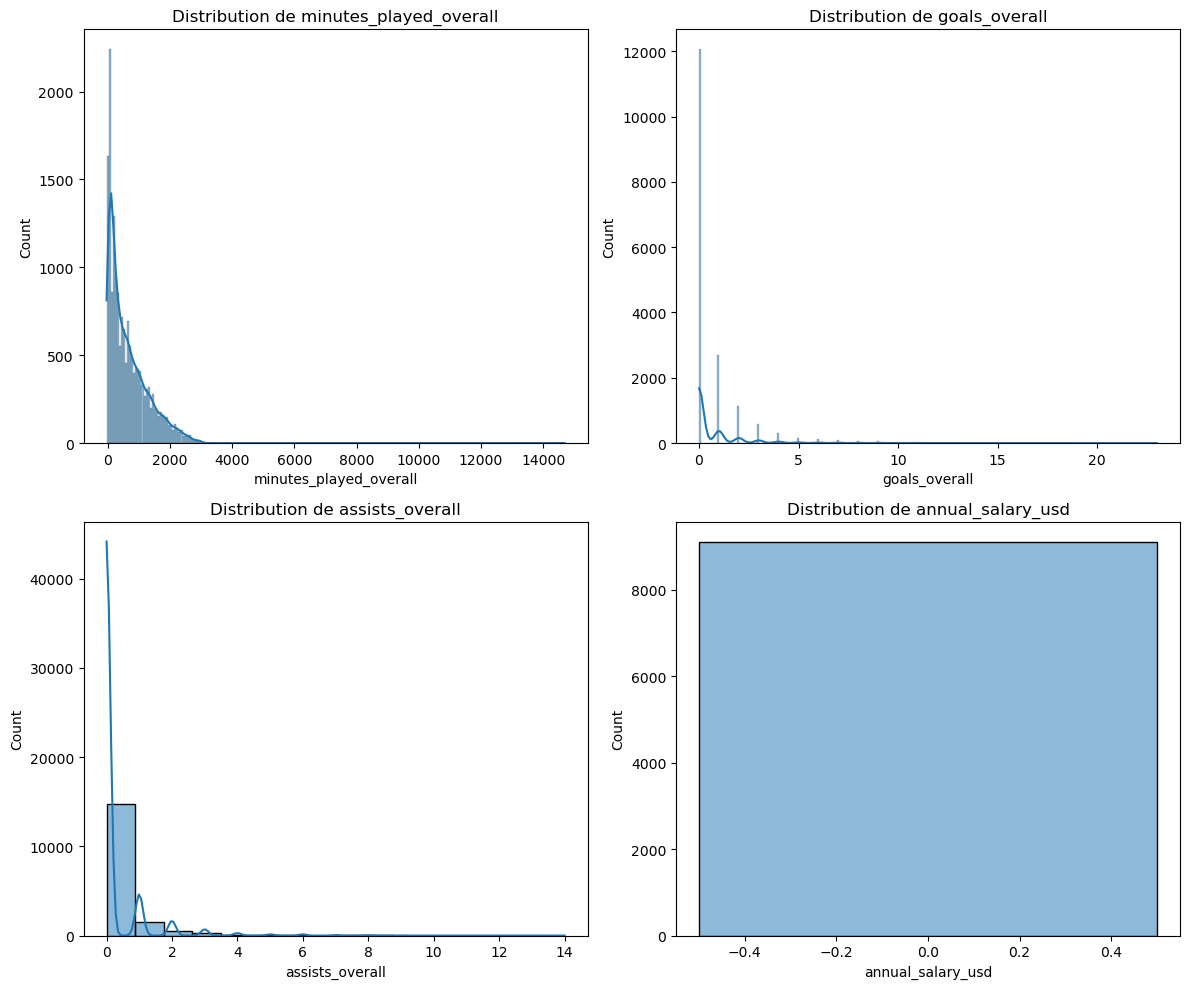

In [85]:
# Distribution des variables clés
selected_features = ["minutes_played_overall", "goals_overall", "assists_overall", "annual_salary_usd"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    sns.histplot(data[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")

plt.tight_layout()
plt.show()


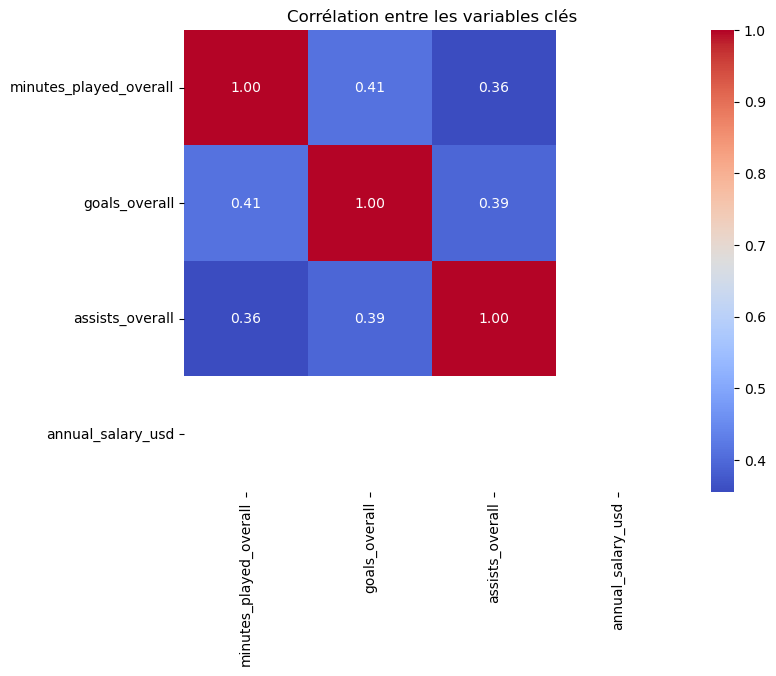

In [86]:
# Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(data[selected_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables clés")
plt.show()


In [87]:
# Normalisation des salaires
data.loc[data["annual_salary_usd"] == 0, "annual_salary_usd"] = data["annual_salary_usd"].median()



In [88]:
# Création d'un score de performance
data["performance_score"] = (
    data["minutes_played_overall"] * 0.2 +
    data["goals_overall"] * 0.4 +
    data["assists_overall"] * 0.3
)
data["performance_score"] = (data["performance_score"] - data["performance_score"].min()) / (
        data["performance_score"].max() - data["performance_score"].min())

print("\n✅ Préparation des données terminée !")
print(data.head())



✅ Préparation des données terminée !
              full_name  age    birthday birthday_GMT   league     season  \
0     Abdel Ali Hammadi   20  1068710400   2003/11/13  Ligue 1  2022/2023   
1        Abdelaziz Litt   31   726825600   1993/01/12  Ligue 1  2022/2023   
2     Abdelbasset Dahou   28   807087600   1995/07/30  Ligue 1  2022/2023   
3  Abdeldjalil Bahoussi   30   744534000   1993/08/05  Ligue 1  2022/2023   
4    Abdeldjalil Mancer   21  1016265600   2002/03/16  Ligue 1  2022/2023   

     position       Current Club  minutes_played_overall  minutes_played_home  \
0  Midfielder      CR Belouizdad                     180                   90   
1  Midfielder  HB Chelghoum Laïd                     584                  283   
2  Midfielder           RC Arbaâ                       2                    0   
3    Defender          El Bayadh                    1163                  530   
4  Midfielder         Paradou AC                     720                  360   

   ...  clea

C:\Users\azizi\AppData\Local\Temp\ipykernel_18872\2898358469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data["position"], order=data["position"].value_counts().index, palette="viridis")


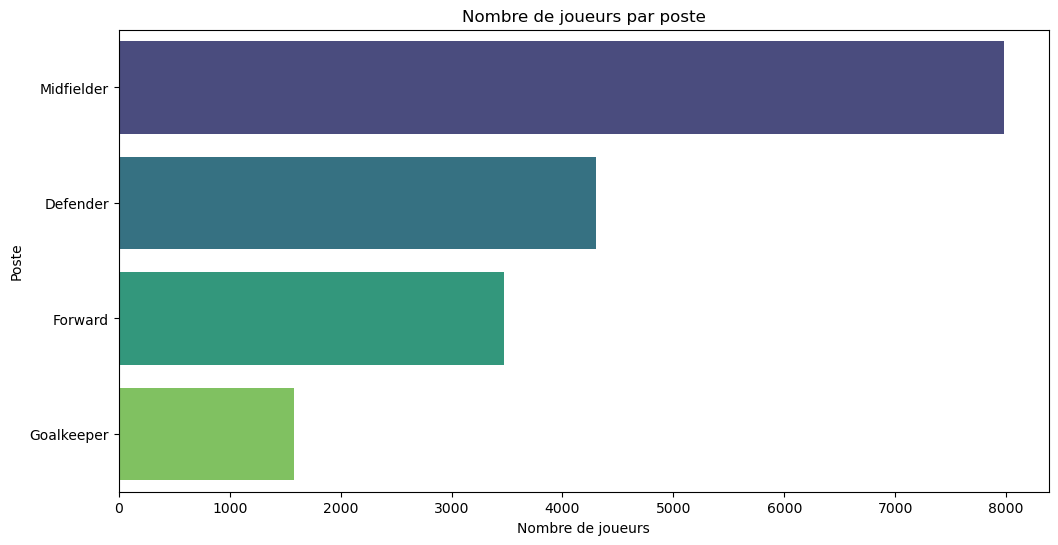

In [93]:
# 4️⃣ Visualisation des joueurs selon différents critères

# 📌 Nombre de joueurs par poste
plt.figure(figsize=(12, 6))
sns.countplot(y=data["position"], order=data["position"].value_counts().index, palette="viridis")
plt.title("Nombre de joueurs par poste")
plt.xlabel("Nombre de joueurs")
plt.ylabel("Poste")
plt.show()




C:\Users\azizi\AppData\Local\Temp\ipykernel_18872\2567110925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_performance_players["full_name"], x=top_performance_players["performance_score"], palette="coolwarm")


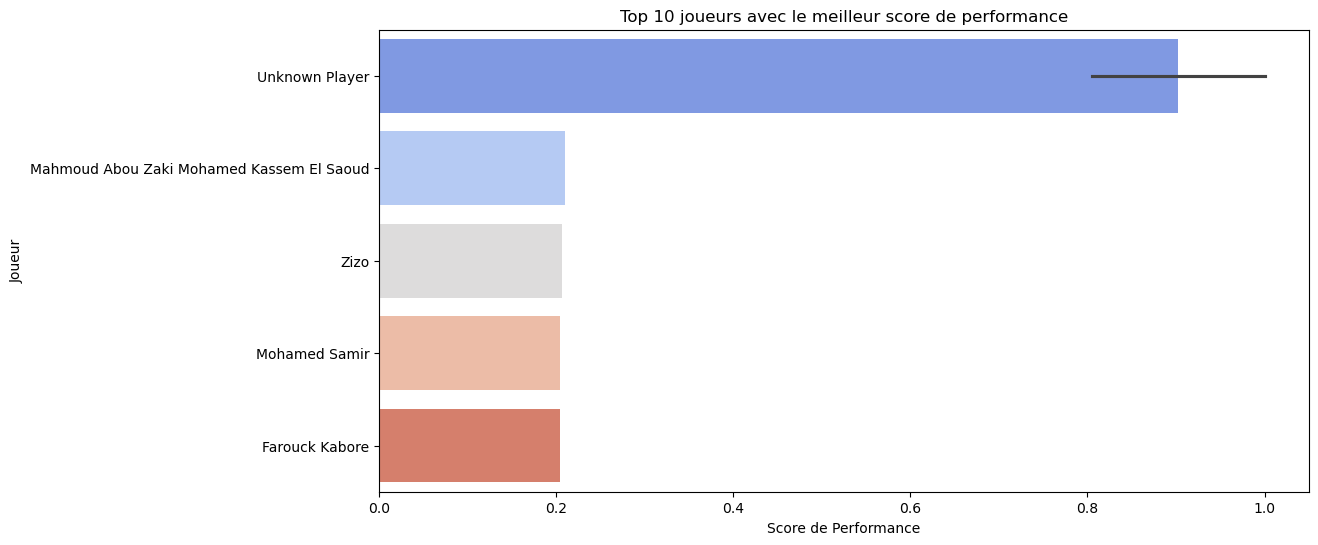

In [95]:
# 🏆 Top 10 joueurs avec le meilleur score de performance
top_performance_players = data.nlargest(10, "performance_score")
plt.figure(figsize=(12, 6))
sns.barplot(y=top_performance_players["full_name"], x=top_performance_players["performance_score"], palette="coolwarm")
plt.title("Top 10 joueurs avec le meilleur score de performance")
plt.xlabel("Score de Performance")
plt.ylabel("Joueur")
plt.show()





















































































































C:\Users\azizi\AppData\Local\Temp\ipykernel_18872\2575191241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_scorers["full_name"], x=top_scorers["goals_overall"], palette="Blues")


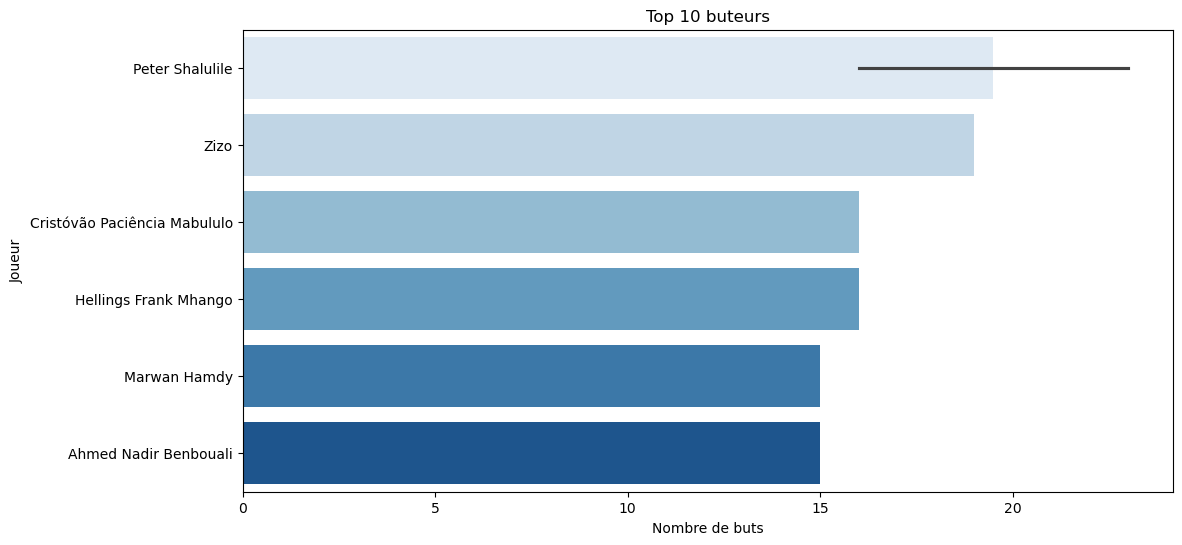

In [97]:
# ⚽ Top 10 des meilleurs buteurs
top_scorers = data.nlargest(10, "goals_overall")
plt.figure(figsize=(12, 6))
sns.barplot(y=top_scorers["full_name"], x=top_scorers["goals_overall"], palette="Blues")
plt.title("Top 10 buteurs")
plt.xlabel("Nombre de buts")
plt.ylabel("Joueur")
plt.show()
